# The "Hello World" of Neural Networks: MNIST dataset

Here we train a neural network on the famous MNIST dataset.

## Our Data

Image classification was one of the major drivers of early neural network development, and here we had one of the early problems: sorting handwritten digits, which is especially useful in mail sorting for instance. Our data includes about 70,000 grayscale images of handwritten digits from 0 to 9, with pixel dimensions of 28x28, and can be found [here.](https://keras.io/api/datasets/mnist/)

## Our Goal

Given a random image, correctly identify the handwritten digit (from 0 to 9).

## Loading our Data

There are many deep learning software packages out there; while we will be working with [Keras](https://www.tensorflow.org/guide/keras) (an api of [Tensorflow](https://www.tensorflow.org)), there are many other packages such as [PyTorch](https://pytorch.org), [Caffe](https://caffe.berkeleyvision.org), and [H2o.ai](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/deep-learning.html).

They all have strengths and weaknesses, but Keras in particular is good for our task today because it is relatively easier to implement, while at the same time giving access to the power of Tensorflow.

Additionally, Keras has some common datasets already integrated in the package itself including the MNIST dataset, making it easy for us to load and begin training our model right away. However, learning how to prepare and load data for analysis is a key skill for any data professional; while you won't need it for this particular project, you will need it in the future.

Lets go ahead and import the dataset and our libraries.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras #to build neural networks

import numpy as np #for the end section
import random #for the end section
import matplotlib.pyplot as plt #for plotting

2023-12-20 10:59:45.315896: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 10:59:45.705824: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 10:59:45.705865: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 10:59:45.708485: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 10:59:45.907611: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 10:59:45.911077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Train, Validation, and Test Splits

If you already know what train, validation and test splits are, great! If not, you might want to start with the [Cross Validation Starter Guide, which includes a coding example!](https://the-examples-book.com/starter-guides/data-science/data-modeling/resampling-methods/cross-validation/train-valid-test) This homework is unlikely to make sense if you are new to neural networks *and* train, valid and test splits; a few minutes read will make splits clear!

We won't be making any test splits today just to keep things short, so let's go ahead and unpack our train and validation splits.

In [2]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

## Exploratory Data Analysis (EDA)

If you are new to the data sciences and haven't heard of EDA before, <a href=https://the-examples-book.com/starter-guides/data-science/data-modeling/process/eda>check out the Starter Guide EDA page</a>- a few minutes read will clarify what we are doing here. Let's go ahead and look at the data to get an idea of what we are dealing with. Starting with the .shape command is always a good sanity check (to verify something didn't go wrong already, and save headache down the road). Recall the pixel dimensions being 28*28, so we should see that here. It's important to know that the train split is 60,000 images, and the valid is 10,000 images, and we see that reflected below. 

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_valid.shape

(10000, 28, 28)

For each pixel, there is a corresponding unsigned 8-bit integer value between 0 and 255 (0 as black, 255 as white) since we are in grayscale. Meaning that in our training data, we have $$60000*28*28=47,040,000$$ numerical values!

Lets go ahead and continue confirming the data we are working with.

In [5]:
x_train.dtype

dtype('uint8')

In [6]:
x_valid.dtype

dtype('uint8')

The data set is all unsigned 8-bit ints.

In [7]:
x_train.min()

0

In [8]:
x_valid.min()

0

In [9]:
x_train.max()

255

In [10]:
x_valid.max()

255

The min and max are what we expect here; there are at least 1 x*y cell in 1 image that is completely white (255) and at least 1 that is completely black (0).

Below, we look at some of the pixel values in the first image in the train split.

In [11]:
x_train[72]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26,
        240,  72,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25,
        238, 208,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Let's go ahead and render one of the images using matplotlib, to get a sense of what these images look like.

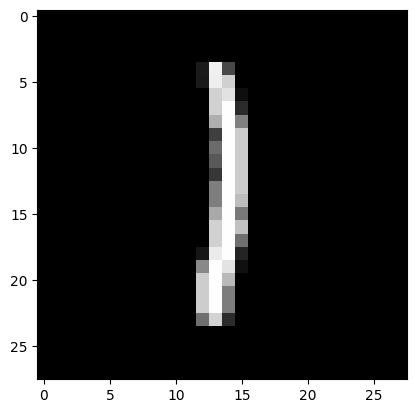

In [12]:
image = x_train[72]
plt.imshow(image, cmap='gray')

What number does that appear to be to you? Let's see what it actually is using the command below.

In [13]:
y_train[72]

1

So far so good. Our exploratory data analysis ensured our data appears like we expect it to; the shape and data types look correct, and we got to see a snippet of our data to see what we are training on.

## Preprocessing

Once again, if new to the data sciences, check out <a href=https://the-examples-book.com/starter-guides/data-science/data-modeling/process/preprocessing>the Starter Guide page on preprocessing.</a> With any data analysis, preprocessing is a key step- and often a big portion of getting data ready to train a model on. Our data here is fairly forgiving, and thankfully we don't have missing data, badly formatted data, incorrect data types, etc. All we have to do is flatten, normalize, then add categorical labels. 

### Flattening the Image Data

When we start, we have a 2 dimensional pixel array. Although its possible to use a 2 dimensional array as the input data, we are going to simplify things and **reshape** our data into a 1 dimensional array composed of $28*28=784$ pixels; that is, our data input should be of the form $60000*784$ for the train data. You will notice that we have the same amount of numerical values we began with, viz., $1*60000*784=47040000$. *We've merely changed the shape of the data to make it simpler to train a model on.*

In [14]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

Let's verify that this transformation did what we thought it would.

In [15]:
x_train.shape

(60000, 784)

In [16]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

That looks right; let's continue.

### Normalization

Here we normalize the data and verify. We normalize by setting all the values on a scale between 0 and 1.

In [17]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [18]:
x_train.dtype

dtype('float64')

In [19]:
x_train.min()

0.0

In [20]:
x_train.max()

1.0

### Categorical Encoding

If you recall at the beginning, our goal was to classify images of these handwritten digits from 0 to 9, meaning that we should have a *scalar* output, ie, a number between 0 and 9.

So we have 10 categories, or labels, of output.

Below is the code to do that in Keras.

In [21]:
#we have 0,1,2,3,4,5,6,7,8,9 as outputs, leading to 10 possible labels in output
num_labels = 10

y_train = keras.utils.to_categorical(y_train, num_labels)
y_valid = keras.utils.to_categorical(y_valid, num_labels)

## Creating the Model

With the data prepared for training, it's time to create the model that we will train the data with. This first basic model will be made up of several **layers** and will be comprised of 3 main parts:

1. An input layer, which will receive data in some expected format.
2. Several [hidden layers](https://developers.google.com/machine-learning/glossary#hidden-layer), each comprised of many *[neurons](https://developers.google.com/machine-learning/glossary#neuron)*. Each neuron will have the ability to affect the network's guess with its *weights*, which are values that will be updated over many iterations as the network gets feedback on its performance and learns.
3. An output layer, which will depict the network's guess for a given image

In general this project has only 1 hidden layer (meaning it doesn't fall under the deep learning category of neural networks). However, some of the best results with this dataset that have been published are approaching 99.9%, some of them with 30+ hidden layers that absolutely are deep learning! [Yann Lecun's](https://en.wikipedia.org/wiki/Yann_LeCun) [website](https://web.archive.org/web/20231113183330/http://yann.lecun.com/exdb/mnist/) links all the papers published using this dataset that have utilized not only very deep neural networks, but other approaches as well, including unsupervised learning approaches like k-nearest neighbors.

### Configuring and Building a Neural Network Model (5 points)

The blessing and the curse of neural networks is they have so many different tuning parameters, also called hyperparameters. 

For this project, I will give you the tuning parameters to start with and fill them in. We are building a 1 hidden layer neural network, with an **input of 784** (recall the $28*28$ flattening/reshaping we did above in the preprocessing step), using **28 neurons in the first hidden layer**, **28 neurons in the second hidden layer**, **using the ReLU activation function for both hidden layers**, and the **softmax activation function for the output layer**. 

*Hint: Input neurons and input shape should be the same*.

### **In the code cell below, you will need to add in the tuning parameters to get the code to work. Here they are again:**

In [ ]:
raise NotImplementedError()

neurons_input = ??
neurons_hidden_layer_1 = ??
neurons_hidden_layer_2 = ??
activation_hidden_layers = ??
input_shape = ??
activation_output_layer = ??

In [24]:
##CORRECT ANSWER KEY
neurons_input = 784
neurons_hidden_layer_1 = 28
neurons_hidden_layer_2 = 28
activation_hidden_layers = 'relu'
input_shape = 784
activation_output_layer = 'softmax'

In [27]:
model = Sequential()
model.add(Dense(units = neurons_input, input_shape=(input_shape,))) #the input layer
model.add(Dense(units = neurons_hidden_layer_1, activation=activation_hidden_layers)) #the hidden layer
model.add(Dense(units = neurons_hidden_layer_2, activation=activation_hidden_layers))
model.add(Dense(units = 10, activation=activation_output_layer)) #the output layer

In [28]:
model.summary() #a printout to summarize our whole model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 28)                21980     
                                                                 
 dense_3 (Dense)             (None, 28)                812       
                                                                 
 dense_4 (Dense)             (None, 10)                290       
                                                                 
Total params: 638522 (2.44 MB)
Trainable params: 638522 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The number of parameters might look large here, but this is a very small neural network! 

Let's compile the model to let Keras know we are done adding layers.

### Compiling and Measuring Model Fit: The Softmax Function

We are outputting exclusive multi-class probabilities. This means that we assign a probability to each image that its one of our categories, so our output will look something like

| 1        | 2    | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 0   |
| ---------|:----:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:|
| .05      |  .05 | .05 | .05 | .05 | .05 | .05 | .05 | .05 | .55 |

When an image is predicted using our model, the *softmax* function assigns a probability that it belongs to any one of the categories.  **The softmax function (and by extension categorical cross entropy) creates the table of probabilities you see above.** In the mock data above, you will notice all the decimals sum to 1, as the softmax function always assigns values between 0 and 1 to each label. We would then select the probability that is the highest, because it represents the label that is most likely correct, according to the model.

You'll notice below that we set the loss function to be *categorical_crossentropy*, which is the same thing as the *softmax* activation function, just in a generalized loss function form. Both are used when you have exclusive, multi class output; in our case, we can't have a digit that is both 0 and 1, or 0 and 3, hence this is exclusive multi class output. 

You'll also notice that the metric we used below is accuracy. In other words, what percent of the time did our model accurately identify the handwritten digit? 

In [29]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Fitting the Model

For neural networks, the model goes up and back down the layers, calculating the **weights** and **biases** of the model in a process called backpropogation. Again, you don't have to know how this works right now, but you should know that one full cycling (through all the layers and back down again) is called an **epoch**. Epoch's are yet another tuning parameter for neural networks.

So below, we are telling Keras to begin fitting the model using the train and valid data, supplying a tuning parameter of 5 epochs, and setting the verbosity level to 1. Verbosity is a typical (optional) programming configuration that lets us control the intensity of notices, warnings, info, and other output that comes from a command. For Keras, when verbose=0, it outputs nothing, but we'd like to see some of what its doing, so lets set it to verbose=1.

In [30]:
model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3198 - accuracy: 0.9055 - val_loss: 0.2290 - val_accuracy: 0.9332
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1982 - accuracy: 0.9427 - val_loss: 0.2138 - val_accuracy: 0.9403
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1742 - accuracy: 0.9510 - val_loss: 0.1833 - val_accuracy: 0.9499
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1572 - accuracy: 0.9548 - val_loss: 0.1791 - val_accuracy: 0.9471
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1477 - accuracy: 0.9593 - val_loss: 0.2263 - val_accuracy: 0.9459


### Reading Keras Output

What does all this output mean? You can see that Keras lets us know the output as it goes up and down in each epoch. At the end of each epoch, it summarizes the results from that training. You might notice that the accuracy metric rose over each epoch, but it seems to have leveled off at the end; a sign that its learning less and less per epoch cycle. 

Recall that the loss is relative to the loss metric being used, meaning its magnitude and scale of difference is dependent on the problem itself. Accuracy is a percentage, between 0 and 1. val_loss and val_accuracy refers to our validation set; the set of data used to briefly validate how good the model is and tune the hyperparameters, before attempting to fit the model further. 

Just out of curiousity, lets continue training, this time doing 5 additional epochs. 

In [31]:
model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1386 - accuracy: 0.9621 - val_loss: 0.1763 - val_accuracy: 0.9535
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1347 - accuracy: 0.9631 - val_loss: 0.1932 - val_accuracy: 0.9508
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1318 - accuracy: 0.9633 - val_loss: 0.1967 - val_accuracy: 0.9534
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1328 - accuracy: 0.9655 - val_loss: 0.1948 - val_accuracy: 0.9551
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1271 - accuracy: 0.9663 - val_loss: 0.1790 - val_accuracy: 0.9532


5 more epochs didn't add much more improvement, but considering that our model is able to correctly identify well over 90% of the images, that's pretty good!

## Making Predictions With Our Model

We've trained a model using our training data, but how can we use this on other data? For instance, if we got more images of handwritten digits, how could we use our model to predict the digits on each given 28*28 image?

Let's take a random image from our validation set; ideally we should use a test set (or another random image that wasn't used for training), but a validation image wasn't used to train the model (just to fine tune the model, which is a biased image, but it will be OK for our purposes here). Let's take a random image from our valid dataset, visually look at it, and have the model predict on it.

In [32]:
image_number = random.randint(0,1000)
pred_image = x_valid[image_number]
yhat = model.predict(np.expand_dims(pred_image,0)) #the np.expand_dims command here just gets our data in a list form so that we can feed it into the model
print(yhat)

1/1 [==============================] - 0s 69ms/step
[[3.3557944e-06 1.8726140e-10 1.9153719e-08 1.4390788e-06 6.2564549e-09
  7.7456434e-06 1.3115229e-11 9.9997914e-01 4.8552973e-08 8.3238847e-06]]


In this form its pretty hard to read. You'll recall above that the output is a set of probabilities representing the chance that the image is one of our 10 labels; so the highest value here will represent what our model predicts is the most likely, based off of its training. Let's use a little numpy to get the max value, and thus the model prediction.

In [33]:
print(np.argmax(yhat))

7


We can check to see what the correct label is using the command below.

In [34]:
print(np.argmax(y_valid[image_number]))

7


You'll notice that, if you keep testing random images, it does seem to guess most of them correctly, just like our Tensorflow output suggests!

# Congratulations! You Just Trained a Neural Network!

Neural networks are powerful; you've seen firsthand that your model was able to predict with 90%+ accuracy which digit between 0-9 was on an image. While there can be quite a bit of setup to neural networks, they are an incredibly valuable data modeling technique that tends to get better with more data.